# 7 WorkFlow

### 7.1 Objetivo

Presentar un workflow/pipeline completo al que los estudiantes deberán enriquecer

#### 7.2  Seteo del ambiente en Google Colab

Esta parte se debe correr con el runtime en Python3
<br>Ir al menu, Runtime -> Change Runtime Type -> Runtime type ->  **Python 3**

Conectar la virtual machine donde esta corriendo Google Colab con el  Google Drive, para poder tener persistencia de archivos

Para correr la siguiente celda es fundamental en Arranque en Frio haber copiado el archivo kaggle.json al Google Drive, en la carpeta indicada en el instructivo

<br>los siguientes comando estan en shell script de Linux
*   Crear las carpetas en el Google Drive
*   "instalar" el archivo kaggle.json desde el Google Drive a la virtual machine para que pueda ser utilizado por la libreria  kaggle de Python
*   Bajar el  **dataset_pequeno**  al  Google Drive  y tambien al disco local de la virtual machine que esta corriendo Google Colab
*   Bajar el **dataset_historico** al Google Drive y tambien al disco local de la virtual machine que esta corriendo Google Colab



*  Si usted eligió modalidad *Gerencial* entonces NO debe modificar nada, su liderazgo logró que otras trabajaron por usted
*  Si usted eligió modalidad de *Analista Junior*, entonces donde dice archivo="gerencial_competencia_2025.csv.gz"  lo debe cambiar por  archivo="analistajr_competencia_2025.csv.gz"
*  Si usted eligió modalidad *Analista Senior*,  ya se las ingenierá SIN preguntar !

## 7.3  Workflow

## Inicializacion

Esta parte se debe correr con el runtime en lenguaje **R** Ir al menu, Runtime -> Change Runtime Type -> Runtime type -> R

limpio el ambiente de R

In [1]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Sat Jul 05 10:49:50 2025"

In [2]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,657046,35.1,1439328,76.9,1432357,76.5
Vcells,1225339,9.4,8388608,64.0,1924957,14.7


In [7]:
require("data.table")

if( !require("R.utils")) install.packages("R.utils")
require("R.utils")

Loading required package: data.table

Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.27.1 (2025-05-02 21:00:05 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.13.0 (2025-02-24 21:20:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, use, warnings




#### Parametros
Si es gerente, no cambie nada
<br>Si es Analista, cambie el nombre del dataset

In [9]:
PARAM <- list()
PARAM$semilla_primigenia <- 847117

PARAM$experimento <- "Colaborativo-3"
PARAM$dataset <- "analistasr_competencia_2025.csv.gz"

#### Carpeta del Experimento

In [10]:
# carpeta de trabajo

setwd("/content/buckets/b1/exp")
experimento_folder <- paste0("WF", PARAM$experimento)
dir.create(experimento_folder, showWarnings=FALSE)
setwd( paste0("/content/buckets/b1/exp/", experimento_folder ))

### 7.3.1   Preprocesamiento del dataset

#### 7.3.1.1  DT incorporar dataset

In [11]:
# lectura del dataset
dataset <- fread(paste0("/content/datasets/", PARAM$dataset))

#### 7.3.1.2  CA  Catastrophe Analysis
Se intentan reparar las variables que para un mes están con todos los valores en cero.

El método que se utiliza es **Machine Learning** se asigna NA also valores, si ha leido bien, es la "anti imputación de valores faltantes"
<br> Usted podrá aplicar aquí otros métodos

In [12]:
dataset[ foto_mes==202006, internet:=NA]
dataset[ foto_mes==202006, mrentabilidad:=NA]
dataset[ foto_mes==202006, mrentabilidad_annual:=NA]
dataset[ foto_mes==202006, mcomisiones:=NA]
dataset[ foto_mes==202006, mactivos_margen:=NA]
dataset[ foto_mes==202006, mpasivos_margen:=NA]
dataset[ foto_mes==202006, mcuentas_saldo:=NA]
dataset[ foto_mes==202006, ctarjeta_visa_transacciones:=NA]
dataset[ foto_mes==202006, mtarjeta_visa_consumo:=NA]
dataset[ foto_mes==202006, mtarjeta_master_consumo:=NA]
dataset[ foto_mes==202006, ccallcenter_transacciones:=NA]
dataset[ foto_mes==202006, chomebanking_transacciones:=NA]
dataset[ foto_mes==202006, chomebanking_transacciones:=NA]

#### 7.3.1.3  DR  Data Drifting
Se intenta corregir el data drifting, quizas ajustando por IPC ...
<br>Esta parte podrá ser abordada por todos los Analistas y también la Gerenciapero se decide pedagogicamente no incluirla en esta primer version para reducir la carga cognitiva

In [ ]:
# sin codigo en esta primera version del workflow

#### 7.3.1.3  FE_intra_manual Feature Engineering intra-mes

Agrego campos nuevos dentro del mismo mes, SIN considerar la historia.

In [13]:
# esta funcion atributos presentes existe debido a que las modalidades poseen datasets con distinta cantidad de campos
atributos_presentes <- function( patributos )
{
  atributos <- unique( patributos )
  comun <- intersect( atributos, colnames(dataset) )

  return(  length( atributos ) == length( comun ) )
}

# el mes 1,2, ..12
if( atributos_presentes( c("foto_mes") ))
  dataset[, kmes := foto_mes %% 100]

# variable extraida de una tesis de maestria de Irlanda
if( atributos_presentes( c("mpayroll", "cliente_edad") ))
  dataset[, mpayroll_sobre_edad := mpayroll / cliente_edad]


In [14]:
# visualizo las columas del dataset a esta etapa
colnames(dataset)

[1] "numero_de_cliente"                   
  [2] "foto_mes"                            
  [3] "active_quarter"                      
  [4] "cliente_vip"                         
  [5] "internet"                            
  [6] "cliente_edad"                        
  [7] "cliente_antiguedad"                  
  [8] "mrentabilidad"                       
  [9] "mrentabilidad_annual"                
 [10] "mcomisiones"                         
 [11] "mactivos_margen"                     
 [12] "mpasivos_margen"                     
 [13] "cproductos"                          
 [14] "tcuentas"                            
 [15] "ccuenta_corriente"                   
 [16] "mcuenta_corriente_adicional"         
 [17] "mcuenta_corriente"                   
 [18] "ccaja_ahorro"                        
 [19] "mcaja_ahorro"                        
 [20] "mcaja_ahorro_adicional"              
 [21] "mcaja_ahorro_dolares"                
 [22] "cdescubierto_preacordado"            
 [23] "mcuentas_saldo"                      
 [24] "ctarjeta_debito"                     
 [25] "ctarjeta_debito_transacciones"       
 [26] "mautoservicio"                       
 [27] "ctarjeta_visa"                       
 [28] "ctarjeta_visa_transacciones"         
 [29] "mtarjeta_visa_consumo"               
 [30] "ctarjeta_master"                     
 [31] "ctarjeta_master_transacciones"       
 [32] "mtarjeta_master_consumo"             
 [33] "cprestamos_personales"               
 [34] "mprestamos_personales"               
 [35] "cprestamos_prendarios"               
 [36] "mprestamos_prendarios"               
 [37] "cprestamos_hipotecarios"             
 [38] "mprestamos_hipotecarios"             
 [39] "cplazo_fijo"                         
 [40] "mplazo_fijo_dolares"                 
 [41] "mplazo_fijo_pesos"                   
 [42] "cinversion1"                         
 [43] "minversion1_pesos"                   
 [44] "minversion1_dolares"                 
 [45] "cinversion2"                         
 [46] "minversion2"                         
 [47] "cseguro_vida"                        
 [48] "cseguro_auto"                        
 [49] "cseguro_vivienda"                    
 [50] "cseguro_accidentes_personales"       
 [51] "ccaja_seguridad"                     
 [52] "cpayroll_trx"                        
 [53] "mpayroll"                            
 [54] "mpayroll2"                           
 [55] "cpayroll2_trx"                       
 [56] "ccuenta_debitos_automaticos"         
 [57] "mcuenta_debitos_automaticos"         
 [58] "ctarjeta_visa_debitos_automaticos"   
 [59] "mttarjeta_visa_debitos_automaticos"  
 [60] "ctarjeta_master_debitos_automaticos" 
 [61] "mttarjeta_master_debitos_automaticos"
 [62] "cpagodeservicios"                    
 [63] "mpagodeservicios"                    
 [64] "cpagomiscuentas"                     
 [65] "mpagomiscuentas"                     
 [66] "ccajeros_propios_descuentos"         
 [67] "mcajeros_propios_descuentos"         
 [68] "ctarjeta_visa_descuentos"            
 [69] "mtarjeta_visa_descuentos"            
 [70] "ctarjeta_master_descuentos"          
 [71] "mtarjeta_master_descuentos"          
 [72] "ccomisiones_mantenimiento"           
 [73] "mcomisiones_mantenimiento"           
 [74] "ccomisiones_otras"                   
 [75] "mcomisiones_otras"                   
 [76] "cforex"                              
 [77] "cforex_buy"                          
 [78] "mforex_buy"                          
 [79] "cforex_sell"                         
 [80] "mforex_sell"                         
 [81] "ctransferencias_recibidas"           
 [82] "mtransferencias_recibidas"           
 [83] "ctransferencias_emitidas"            
 [84] "mtransferencias_emitidas"            
 [85] "cextraccion_autoservicio"            
 [86] "mextraccion_autoservicio"            
 [87] "ccheques_depositados"                
 [88] "mcheques_depositados"                
 [89] "ccheques_emitidos"                 

#### 7.3.1.4  FE_rf Feature Engineering de nuevas variables a partir de hojas de Random Forest

Esto se mostrará unicamente a la *modalidad Analista Sr*

In [ ]:
# No se implementa Feature Engineering a partir de Random Forest

#### 7.3.1.5  FEhist Feature Engineering historico

El Fature Engineering Histórico es la etapa que más aporta a la ganancia final, ya que enriquece cada registro del dataset con su historia.

Para cada campo del dataset original (*)
se crean lo siguientes campos de a partir de la historia
* lag1  lags de orden 1
* delta1  =  valor actual - lag1
* lag2  lags de orden 2
* delta2  = valor actual - lag2


(*) Excepto para los campos  <numero_de_cliente,  foto_mes,  clase_ternaria>

In [15]:
# Feature Engineering Historico

# todo es lagueable, menos la primary key y la clase
cols_lagueables <- copy( setdiff(
    colnames(dataset),
    c("numero_de_cliente", "foto_mes", "clase_ternaria")
) )

# https://rdrr.io/cran/data.table/man/shift.html

# lags de orden 1
dataset[,
    paste0(cols_lagueables, "_lag1") := shift(.SD, 1, NA, "lag"),
    by = numero_de_cliente,
    .SDcols = cols_lagueables
]

# lags de orden 2
dataset[,
    paste0(cols_lagueables, "_lag2") := shift(.SD, 2, NA, "lag"),
    by = numero_de_cliente,
    .SDcols = cols_lagueables
]

# agrego los delta lags
for (vcol in cols_lagueables)
{
    dataset[, paste0(vcol, "_delta1") := get(vcol) - get(paste0(vcol, "_lag1"))]
    dataset[, paste0(vcol, "_delta2") := get(vcol) - get(paste0(vcol, "_lag2"))]
}


Verificacion de los campos recien creados

In [16]:
ncol(dataset)
colnames(dataset)

[1] 773

[1] "numero_de_cliente"                          
  [2] "foto_mes"                                   
  [3] "active_quarter"                             
  [4] "cliente_vip"                                
  [5] "internet"                                   
  [6] "cliente_edad"                               
  [7] "cliente_antiguedad"                         
  [8] "mrentabilidad"                              
  [9] "mrentabilidad_annual"                       
 [10] "mcomisiones"                                
 [11] "mactivos_margen"                            
 [12] "mpasivos_margen"                            
 [13] "cproductos"                                 
 [14] "tcuentas"                                   
 [15] "ccuenta_corriente"                          
 [16] "mcuenta_corriente_adicional"                
 [17] "mcuenta_corriente"                          
 [18] "ccaja_ahorro"                               
 [19] "mcaja_ahorro"                               
 [20] "mcaja_ahorro_adicional"                     
 [21] "mcaja_ahorro_dolares"                       
 [22] "cdescubierto_preacordado"                   
 [23] "mcuentas_saldo"                             
 [24] "ctarjeta_debito"                            
 [25] "ctarjeta_debito_transacciones"              
 [26] "mautoservicio"                              
 [27] "ctarjeta_visa"                              
 [28] "ctarjeta_visa_transacciones"                
 [29] "mtarjeta_visa_consumo"                      
 [30] "ctarjeta_master"                            
 [31] "ctarjeta_master_transacciones"              
 [32] "mtarjeta_master_consumo"                    
 [33] "cprestamos_personales"                      
 [34] "mprestamos_personales"                      
 [35] "cprestamos_prendarios"                      
 [36] "mprestamos_prendarios"                      
 [37] "cprestamos_hipotecarios"                    
 [38] "mprestamos_hipotecarios"                    
 [39] "cplazo_fijo"                                
 [40] "mplazo_fijo_dolares"                        
 [41] "mplazo_fijo_pesos"                          
 [42] "cinversion1"                                
 [43] "minversion1_pesos"                          
 [44] "minversion1_dolares"                        
 [45] "cinversion2"                                
 [46] "minversion2"                                
 [47] "cseguro_vida"                               
 [48] "cseguro_auto"                               
 [49] "cseguro_vivienda"                           
 [50] "cseguro_accidentes_personales"              
 [51] "ccaja_seguridad"                            
 [52] "cpayroll_trx"                               
 [53] "mpayroll"                                   
 [54] "mpayroll2"                                  
 [55] "cpayroll2_trx"                              
 [56] "ccuenta_debitos_automaticos"                
 [57] "mcuenta_debitos_automaticos"                
 [58] "ctarjeta_visa_debitos_automaticos"          
 [59] "mttarjeta_visa_debitos_automaticos"         
 [60] "ctarjeta_master_debitos_automaticos"        
 [61] "mttarjeta_master_debitos_automaticos"       
 [62] "cpagodeservicios"                           
 [63] "mpagodeservicios"                           
 [64] "cpagomiscuentas"                            
 [65] "mpagomiscuentas"                            
 [66] "ccajeros_propios_descuentos"                
 [67] "mcajeros_propios_descuentos"                
 [68] "ctarjeta_visa_descuentos"                   
 [69] "mtarjeta_visa_descuentos"                   
 [70] "ctarjeta_master_descuentos"                 
 [71] "mtarjeta_master_descuentos"                 
 [72] "ccomisiones_mantenimiento"                  
 [73] "mcomisiones_mantenimiento"                  
 [74] "ccomisiones_otras"                          
 [75] "mcomisiones_otras"                          
 [76] "cforex"                                     
 [77] "cforex_buy"                                

#### 7.3.1.6  FEhist Reduccion dimensionalidad con canaritos

Esta etapa solo se mostrará a la *modalidad Anlista Sr* por algun canal secreto de forma de no confundir a los *Analista Jr*  nni distraer con detalles operativos a la estratégica *Modalidad Gerencial*

In [ ]:
# No se implementa la reduccion de la dimensionalidad con canaritos

Visualizando los meses de la pandemia

### 7.3.2 Modelado

In [17]:
PARAM$trainingstrategy$validate <- c(202107)

PARAM$trainingstrategy$training <- c(
  202106, 202105, 202104, 202103, 202102, 202101,
  202012, 202011, 202010, 202009, 202002, 202001,
  201912, 201911, 201910, 201909, 201908, 201907,
  201906, 201905, 201904, 201903, 201902, 201901
)

PARAM$trainingstrategy$training_pct <- 1.0


PARAM$trainingstrategy$positivos <- c( "BAJA+1", "BAJA+2")

In [13]:
library(ggplot2)


In [14]:
meses_a_plotear <- c(PARAM$trainingstrategy$validate, PARAM$trainingstrategy$training)

In [15]:
dataset_filtrado <- dataset[foto_mes %in% meses_a_plotear]
# Calcula la cantidad de ocurrencias por clase y mes
proporciones_por_mes <- dataset_filtrado[, .N, by = .(foto_mes, clase_ternaria)]

# Calcula el total de observaciones por mes para luego obtener las proporciones
proporciones_por_mes[, TotalMes := sum(N), by = foto_mes]

# Calcula la proporción
proporciones_por_mes[, Proporcion := N / TotalMes]

# Etiqueta las clases como 'Positivos' o 'Negativos'
proporciones_por_mes[, TipoClase := ifelse(clase_ternaria %in% PARAM$trainingstrategy$positivos, "Positivo", "Negativo")]

# Filtra solo los positivos y suma sus proporciones si hay múltiples clases "positivas"
proporcion_positivos_por_mes <- proporciones_por_mes[TipoClase == "Positivo",
                                                     .(Proporcion = sum(Proporcion)),
                                                     by = foto_mes]

# Ordena por foto_mes para una correcta representación
setorder(proporcion_positivos_por_mes, foto_mes)

# Convierte foto_mes a factor para que ggplot lo trate como categorías en el eje X,
# lo cual es común y se ve mejor en gráficos de barras para meses discretos.
proporcion_positivos_por_mes[, foto_mes_label := factor(foto_mes)]

print(proporcion_positivos_por_mes)



    foto_mes  Proporcion foto_mes_label
       <int>       <num>         <fctr>
 1:   201901 0.011056303         201901
 2:   201902 0.011483162         201902
 3:   201903 0.011582399         201903
 4:   201904 0.010036511         201904
 5:   201905 0.009504568         201905
 6:   201906 0.010129414         201906
 7:   201907 0.009910339         201907
 8:   201908 0.009535125         201908
 9:   201909 0.008694872         201909
10:   201910 0.008911109         201910
11:   201911 0.009362590         201911
12:   201912 0.009244178         201912
13:   202001 0.008127474         202001
14:   202002 0.004895677         202002
15:   202003 0.003803815         202003
16:   202004 0.006226984         202004
17:   202005 0.007679452         202005
18:   202006 0.007909760         202006
19:   202007 0.006852320         202007
20:   202008 0.006206019         202008
21:   202009 0.006596749         202009
22:   202010 0.006270065         202010
23:   202011 0.006689548         202011


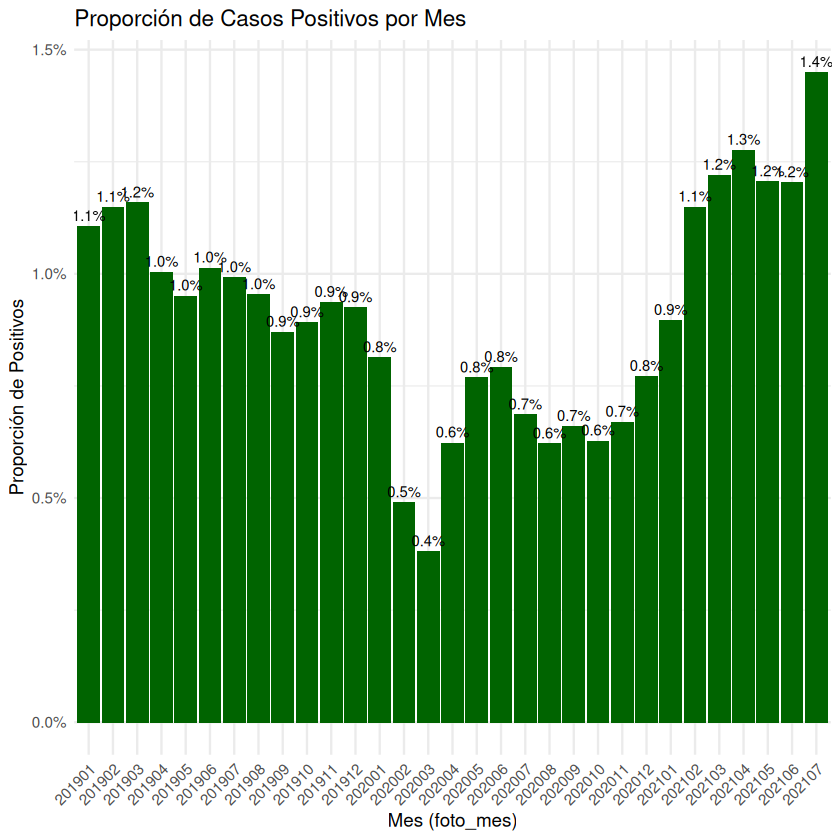

In [16]:
ggplot(proporcion_positivos_por_mes, aes(x = foto_mes_label, y = Proporcion)) +
    geom_bar(stat = "identity", fill = "darkgreen") + # Dibuja las barras, stat="identity" usa los valores de Proporcion
    geom_text(aes(label = scales::percent(Proporcion, accuracy = 0.1)),
              vjust = -0.5, # Ajusta la posición vertical del texto para que quede encima de la barra
              color = "black", size = 3) +
    scale_y_continuous(labels = scales::percent) + # Formatea el eje Y como porcentajes
    labs(title = "Proporción de Casos Positivos por Mes",
         x = "Mes (foto_mes)",
         y = "Proporción de Positivos") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rota etiquetas del eje x

#### 7.3.2.1 Training Strategy

Esta etapa de Workflow de  Training Strategy esta pensada para la *Modalidad Gerencial* que posee el dataset de [202005, 202109]
<br> Si usted es un Analista, posee el periodo de [201901, 202109] y deberá experimentar en que meses le conviene experimentar

<br> A la *Modalidad Gerencial* no se le complicada la vida con el undersampling de los continua, por eso PARAM$trainingstrategy$training_pct <- 1.0
<br> Sin embargo, si usted es  *Analista SR* posee un dataset 50 veces ( filas x columnas) más grande que la *Modalidad Gerencial*  y por un tema de velocidad y experimentación más rápida puede llegar a necesitar activar el undersampling de la clase mayoritaria, a pesar de estar corriendo en Google Cloud.

Se hace una estrategia de entrenamiento muy sencilla, tomando todos los meses posibles, SIN eliminar nada x pandemia ni por ningun otro motivo

* future = 202109  obviamente completo

* final_train =  [ 202005, 202107 ]  con un undersampling de los CONTINUA del 2% por un tema de velocidad

* training
   * testing = NO HAY
   * validation =  202107   completo, sin undersampling
   * training = [ 202005, 202106 ]  donde se consideran el 100% de los CONTINUA

In [18]:
PARAM$trainingstrategy$validate <- c(202107)

PARAM$trainingstrategy$training <- c(
  202106, 202105, 202104, 202103, 202102, 202101,
  202012, 202011, 202010, 202009, 202002, 202001,
  201912, 201911, 201910, 201909, 201908, 201907,
  201906, 201905, 201904, 201903, 201902, 201901
)

PARAM$trainingstrategy$training_pct <- 0.1


PARAM$trainingstrategy$positivos <- c( "BAJA+1", "BAJA+2")

In [19]:
# seteo la clase01   1={BAJA+1, BAJA+2}   0={CONTINUA}
dataset[, clase01 := ifelse( clase_ternaria %in% PARAM$trainingstrategy$positivos, 1, 0 )]

In [20]:
# los campos en los que se entrena
campos_buenos <- copy( setdiff(
    colnames(dataset), c("clase_ternaria","clase01","azar"))
)

In [21]:
# preparo para que se puede hacer undersampling de los CONTINUA
#  solamente por un tema de VELOCIDAD
set.seed(PARAM$semilla_primigenia, kind = "L'Ecuyer-CMRG")
dataset[, azar:=runif(nrow(dataset))]

# undersampling de los CONTINUA
dataset[, fold_train :=  foto_mes %in%  PARAM$trainingstrategy$training &
    (clase_ternaria %in% c("BAJA+1", "BAJA+2") |
     azar < PARAM$trainingstrategy$training_pct ) ]


if( !require("lightgbm")) install.packages("lightgbm")
require("lightgbm")

dtrain <- lgb.Dataset(
  data= data.matrix(dataset[fold_train == TRUE, campos_buenos, with = FALSE]),
  label= dataset[fold_train == TRUE, clase01],
  free_raw_data= TRUE
)

Loading required package: lightgbm



In [22]:
# datos de validation
dvalidate <- lgb.Dataset(
  data= data.matrix(dataset[foto_mes %in% PARAM$trainingstrategy$validate, campos_buenos, with = FALSE]),
  label= dataset[foto_mes %in% PARAM$trainingstrategy$validate, clase01],
  free_raw_data= TRUE
)

nrow(dvalidate)

[1] 164596

####  7.3.2.2. Hyperparameter Tuning

* Clase binaria que se optimiza :  positivos = [ BAJA+1, BAJA+2 ]

* Metrica que se optimiza **AUC** Area Under Curve de la  ROC Curve

es muy importante notar que intencionalmente  **NO** se está optimizando la funcion de ganancia del problema

* Cantidad de iteraciones inteligentes de la Optimizacion Bayesiana = **10**

* Parametros no default, fijos de LightGBM que no se optimizan
  * max_bin = 31 , Alienigenas Ancestrales contruyeron las pirámides y dejaron a la humanidad en un jeroglifico  *max_bin=31*
  * feature_fraction = 0.5  para poner algo que generalmente no falla
  * learning_rate = 0.03  para que aprenda lento


* Parametros que se optimizan en la Bayesian Optimization
  * num_leaves  [8, 256]
  * min_data_in_leaf  [8, 8192]

In [23]:
# paquetes necesarios para la Bayesian Optimization
if(!require("DiceKriging")) install.packages("DiceKriging")
require("DiceKriging")

if(!require("mlrMBO")) install.packages("mlrMBO")
require("mlrMBO")

Loading required package: DiceKriging

Loading required package: mlrMBO

Loading required package: mlr

Loading required package: ParamHelpers


Attaching package: ‘ParamHelpers’


The following object is masked from ‘package:R.utils’:

    isVector



Attaching package: ‘mlr’


The following objects are masked from ‘package:R.utils’:

    resample, setThreshold


Loading required package: smoof

Loading required package: checkmate


Attaching package: ‘checkmate’


The following object is masked from ‘package:DiceKriging’:

    checkNames


The following object is masked from ‘package:R.utils’:

    asInt



Attaching package: ‘smoof’


The following objects are masked from ‘package:R.oo’:

    getDescription, getName




Definición de la Bayesian Optimization
<br> Si se desea optimizar un hiperparámetro que esta como fijo, debe QUITARSE de param_fijos y agregarse a PARAM$hipeparametertuning$hs

In [24]:
# valor ridiculamente bajo para que corra rapido en el aula y no molestar a la *Modalidad Gerencial*
PARAM$hipeparametertuning$num_interations <- 80

# parametros fijos del LightGBM
PARAM$lgbm$param_fijos <- list(
  objective= "binary",
  metric= "auc",
  first_metric_only= TRUE,
  boost_from_average= TRUE,
  feature_pre_filter= FALSE,
  verbosity= -100,
  force_row_wise= TRUE, # para evitar warning
  seed= PARAM$semilla_primigenia,
  max_bin= 31,
  learning_rate= 0.03,
  feature_fraction= 0.5,
  num_iterations= 2048,  # valor grande, lo limita early_stopping_rounds
  early_stopping_rounds= 200
)

PARAM$hipeparametertuning$hs <- makeParamSet(
  makeIntegerParam("num_leaves", lower = 2L, upper = 300L),
  makeIntegerParam("min_data_in_leaf", lower = 2L, upper = 8192L)
)

Función "señora caja negra"  que es llamada para verificar la realidad por la Bayesian Optimization

In [25]:
# En  x llegan los parmaetros de la bayesiana
#  devuelve la AUC en validate del modelo entrenado
#  en el parametro x llegan los hiperparámetros que se estan optimizando

EstimarGanancia_AUC_lightgbm <- function(x) {

  message(format(Sys.time(), "%a %b %d %X %Y"))

  # uno la lista de hiperparametros : fijos + variables
  param_completo <- c(PARAM$lgbm$param_fijos, x)

  # entreno LightGBM
  modelo_train <- lgb.train(
    data= dtrain,
    valids= list(valid = dvalidate),
    eval= "auc",
    param= param_completo,
    verbose= -100
  )

  # recupero la AUC en validation
  AUC <- modelo_train$record_evals$valid$auc$eval[[modelo_train$best_iter]]

  # esta es la forma de devolver un parametro extra
  attr(AUC, "extras") <- list("num_iterations"= modelo_train$best_iter)

  # hago espacio en la memoria
  rm(modelo_train)
  gc(full= TRUE, verbose= FALSE)

  return(AUC)
}

seteo de la Bayesian Optimization (complejo)
<br> copiado y pegado de la documentación de la librería

In [26]:
configureMlr(show.learner.output = FALSE)

# configuro la busqueda bayesiana,  los hiperparametros que se van a optimizar
# por favor, no desesperarse por lo complejo
obj.fun <- makeSingleObjectiveFunction(
    fn= EstimarGanancia_AUC_lightgbm, # la funcion que voy a maximizar
    minimize= FALSE, # estoy Maximizando AUC
    noisy= FALSE,
    par.set= PARAM$hipeparametertuning$hs,
    has.simple.signature= FALSE # paso los parametros en una lista
)

# cada 600 segundos guardo el resultado intermedio
ctrl <- makeMBOControl(
    save.on.disk.at.time= 600,
    save.file.path= "HT.RDATA"
)

# indico la cantidad de iteraciones que va a tener la Bayesian Optimization
ctrl <- setMBOControlTermination(
    ctrl,
    iters= PARAM$hipeparametertuning$num_interations  # cantidad de iteraciones inteligentes
)

# defino el método estandar para la creacion de los puntos iniciales
#   los "No Inteligentes"
ctrl <- setMBOControlInfill(ctrl, crit = makeMBOInfillCritEI())

# mas configuraciones
surr.km <- makeLearner(
    "regr.km",
    predict.type= "se",
    covtype= "matern3_2",
    control= list(trace = TRUE)
)

Corrida de la Bayesian Optimization,  aqui se hace el trabajo pesado
<br> por favor no se asuste con los warnings que pudieran aparecer

Si corrío a medias y llegó a las iteraciones inteligentes, en el archivo binario HT.RDATA quedó lo ya procesado y es utilizado para retomar la corrida desde lo último que llegó a grabar.

In [27]:
# inicio la optimizacion bayesiana

if (!file.exists("HT.RDATA")) {
  bayesiana_salida <- mbo(obj.fun, learner= surr.km, control= ctrl)
} else {
  bayesiana_salida <- mboContinue("HT.RDATA") # retomo en caso que ya exista
}

Warning message in generateDesign(control$infill.opt.focussearch.points, ps.local, :
“generateDesign could only produce 860 points instead of 1000!”
Warning message in generateDesign(control$infill.opt.focussearch.points, ps.local, :
“generateDesign could only produce 111 points instead of 1000!”
Warning message in generateDesign(control$infill.opt.focussearch.points, ps.local, :
“generateDesign could only produce 999 points instead of 1000!”
Warning message in generateDesign(control$infill.opt.focussearch.points, ps.local, :
“generateDesign could only produce 996 points instead of 1000!”
Fri Jul 04 14:05:23 2025

[mbo] 76: num_leaves=300; min_data_in_leaf=6943 : y = 0.942 : 710.1 secs : infill_ei

Saved the current state after iteration 77 in the file HT.RDATA.

Warning message in generateDesign(control$infill.opt.focussearch.points, ps.local, :
“generateDesign could only produce 990 points instead of 1000!”
Warning message in generateDesign(control$infill.opt.focussearch.points, ps.l

la bayesian optimization ha corrido, extraigo los mejores hiperparametros

In [28]:
# almaceno los resultados de la Bayesian Optimization
# y capturo los mejores hiperparametros encontrados

tb_bayesiana <- as.data.table(bayesiana_salida$opt.path)

# ordeno en forma descendente por AUC = y
setorder(tb_bayesiana, -y, -num_iterations)

# grabo para eventualmente poder utilizarlos en OTRA corrida
fwrite( tb_bayesiana,
  file="BO_log.txt",
  sep="\t"
)

# los mejores hiperparámetros son los que quedaron en el registro 1 de la tabla
PARAM$out$lgbm$mejores_hiperparametros <- tb_bayesiana[
  1, # el primero es el de mejor AUC
  list(num_leaves, min_data_in_leaf, num_iterations)
]

print(PARAM$out$lgbm$mejores_hiperparametros)

   num_leaves min_data_in_leaf num_iterations
        <int>            <int>          <int>
1:        287              511           2047


### 7.3.3 Produccion

### Final Training
Construyo el modelo final, que es uno solo, no hace ningun tipo de particion < training, validation, testing>]

#### Final Training Dataset

Aqui esta la gran decision de en qué meses hago el Final Training
<br> debo utilizar los mejores hiperparámetros que encontré en la optimización bayesiana

In [29]:
# calculo la cantidad de datos antes del undersampling
positivos <- dataset[foto_mes %in% PARAM$trainingstrategy$training & clase_ternaria %in% PARAM$trainingstrategy$positivos]
continuas <- dataset[foto_mes %in% PARAM$trainingstrategy$training & clase_ternaria == "CONTINUA"]

# total que habrías usado sin undersampling
total_original <- nrow(positivos) + nrow(continuas)

# total que usaste con el undersampling
continuas_usadas <- round(nrow(continuas) * PARAM$trainingstrategy$training_pct)
total_usado <- nrow(positivos) + continuas_usadas

# factor de reducción
factor <- total_usado / total_original

# min_data_in_leaf optimizado por la bayesiana
original_leaf <- PARAM$out$lgbm$mejores_hiperparametros$min_data_in_leaf

# ajuste
ajustado_leaf <- round(original_leaf / factor)

cat("Valor original de min_data_in_leaf: ", original_leaf, "\n")
cat("Factor de reducción: ", round(factor, 3), "\n")
cat("Nuevo min_data_in_leaf ajustado: ", ajustado_leaf, "\n")

# actualizar para el final training
PARAM$out$lgbm$mejores_hiperparametros$min_data_in_leaf <- ajustado_leaf


Valor original de min_data_in_leaf:  511 
Factor de reducción:  0.108 
Nuevo min_data_in_leaf ajustado:  4724 


In [30]:
# uno los parametros fijos y los mejores encontrados por la Bayesian Optimization
fijos <- copy(PARAM$lgbm$param_fijos)
fijos$num_iterations <- NULL
fijos$early_stopping_rounds <- NULL
param_final <- c(fijos, PARAM$out$lgbm$mejores_hiperparametros)

In [31]:
PARAM$trainingstrategy$final_train <- c(202106, 202105,202104, 202103, 202102, 202101,
  202012, 202011, 202010, 202009,202002,202001,201912,201911,201910,201909,201908,201907,201906,201905,201904,201903,201902,201901)

dataset[, fold_final_train := foto_mes %in% PARAM$trainingstrategy$final_train ]

# creo el dfinal_train en formato  LightGBM
dfinal_train <- lgb.Dataset(
  data= data.matrix(dataset[fold_final_train == TRUE, campos_buenos, with= FALSE]),
  label= dataset[fold_final_train == TRUE, clase01],
  free_raw_data= TRUE
)

nrow( dfinal_train) # verifico el tamaño

[1] 4239742

In [32]:
fijos <- copy(PARAM$lgbm$param_fijos)

# quito lo que optimice en la Bayesian Optimization
fijos$num_iterations <- NULL
fijos$early_stopping_rounds <- NULL

# agrego a los hiperparametros fijos los que encontre con la Bayesian Optimization
param_final <- c(fijos, PARAM$out$lgbm$mejores_hiperparametros)

In [ ]:
PARAM$trainingstrategy$future <-c(202107)

for (semilla in c(234113, 456193, 678019, 812321, 950713,295007, 847117, 758791, 621661, 970741 )){
    fijos$seed = semilla

    # agrego a los hiperparametros fijos los que encontre con la Bayesian Optimization
    param_final <- c(fijos, PARAM$out$lgbm$mejores_hiperparametros)

    # Entrenamiento del modelo
    final_model <- lgb.train(
      data= dfinal_train,
      param= param_final,
      verbose= -100
    )

    # grabo a disco el modelo en un formato para seres humanos ... ponele ...
    lgb.save(final_model, paste0("modelo_", semilla, ".txt"))

    # ahora imprimo la importancia de variables
    tb_importancia <- as.data.table(lgb.importance(final_model))
    archivo_importancia <- paste0("impo_", semilla, ".txt")

    fwrite( tb_importancia,
      file= archivo_importancia,
      sep= "\t"
    )

    #Predicción para datos del futuro
    dfuture <- dataset[ foto_mes %in% PARAM$trainingstrategy$future ]

    prediccion <- predict(
      final_model,
      data.matrix(dfuture[, campos_buenos, with= FALSE])
    )

    tb_prediccion <- dfuture[, list(numero_de_cliente, clase_ternaria)]
    tb_prediccion[, prob := prediccion]

    # grabo las probabilidad del modelo
    #  me va a ser util para hacer Ensembles de modelos
    fwrite(tb_prediccion,
      file= paste0("prediccion_", semilla, ".txt"),
      sep= "\t"
    )

    # Elimino cosas de la memoria por las dudas
    rm(final_model)
    rm(tb_importancia)
    rm(dfuture)
    rm(prediccion)
    rm(tb_prediccion)

}


# Envíos

# Visualizando las ganancias

In [ ]:
if (!require("stringr")) install.packages("stringr")
library(stringr)
library(ggplot2)

In [ ]:
cortes <- 2*seq(800, 1300, by = 50)


In [ ]:
# Ruta donde están los experimentos
base_path <- "/content/buckets/b1/exp"

# Listar carpetas que contienen 'Colaborativo' (o cualquier otro filtro)
carpetas <- list.dirs(path = base_path, recursive = FALSE, full.names = TRUE)
carpetas <- carpetas[grepl("Colaborativo", carpetas)]


In [ ]:
# Inicializar lista de resultados (¡importante limpiar!)
resultados <- list()

In [ ]:
for (carpeta in carpetas) {
  archivos <- list.files(path = carpeta, pattern = "^prediccion_\\d+\\.txt$", full.names = TRUE)

  for (archivo in archivos) {
    pred <- fread(archivo)
    pred <- pred[order(-prob)]

    pred[, Ganancia := ifelse(clase_ternaria == "BAJA+2", 117000, -3000)]
    pred[, Ganancia_acum := cumsum(Ganancia)]

    cortes <- seq(200, 6000, 50)
    pred_cortes <- pred[cortes, .(envios = cortes, Ganancia_acum)]

    pred_cortes[, semilla := str_extract(basename(archivo), "\\d+")]
    pred_cortes[, exp := basename(carpeta)]

    resultados[[length(resultados) + 1]] <- pred_cortes
  }
}

# Combinar resultados
curvas <- rbindlist(resultados)

# No promediar, simplemente preparar los datos para visualizar todas las curvas
# El data.frame 'curvas' ya contiene todas las curvas individuales

# Gráfico de todas las curvas
ggplot(curvas, aes(x = envios, y = Ganancia_acum, color = exp, group = semilla)) +
  geom_line(size = 1.2, alpha = 0.7) +  # alpha para dar un toque de transparencia
  labs(
    title = "Curvas de ganancia por experimento",
    subtitle = "Curvas individuales para cada semilla en cada experimento",
    x = "Cantidad de envíos",
    y = "Ganancia acumulada ($)",
    color = "Experimento"
  ) +
  theme_minimal(base_size = 14)
